<a href="https://colab.research.google.com/github/HarshitM567/Keras_ANN_Architecture/blob/main/Keras_Basic_ANN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import warnings
warnings.filterwarnings("ignore")

#first neural network with keras tutorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

#Pandas options
pd.set_option('display.float_format', lambda x: '%.4f' % x)

**Model Building in Tensorflow - MNIST Dataset**

In [5]:
#load tensorflow
import tensorflow as tf
mnist = tf.keras.datasets.mnist

#fix random seed for reproducibility
np.random.seed(5)
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
print(f"data type of X_train {X_train_full.dtype},\nshape of X_tain_full {X_train_full.shape}")
print(f"data type of X_test {X_test.dtype},\nshape of X_test {X_test.shape}")

data type of X_train uint8,
shape of X_tain_full (60000, 28, 28)
data type of X_test uint8,
shape of X_test (10000, 28, 28)


In [7]:
#create a validation dataset from the fulling training data
#scale data between 0 and 1 by dividing it by 255. Ads its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#scale test set as well
X_test =  X_test / 255.0

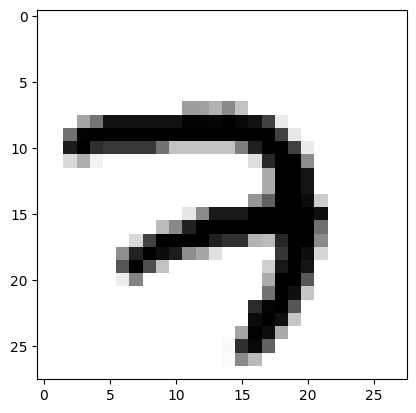

In [8]:
#lets view the first data point of X_train
plt.imshow(X_train[0], cmap = "binary")
plt.show()

<Axes: >

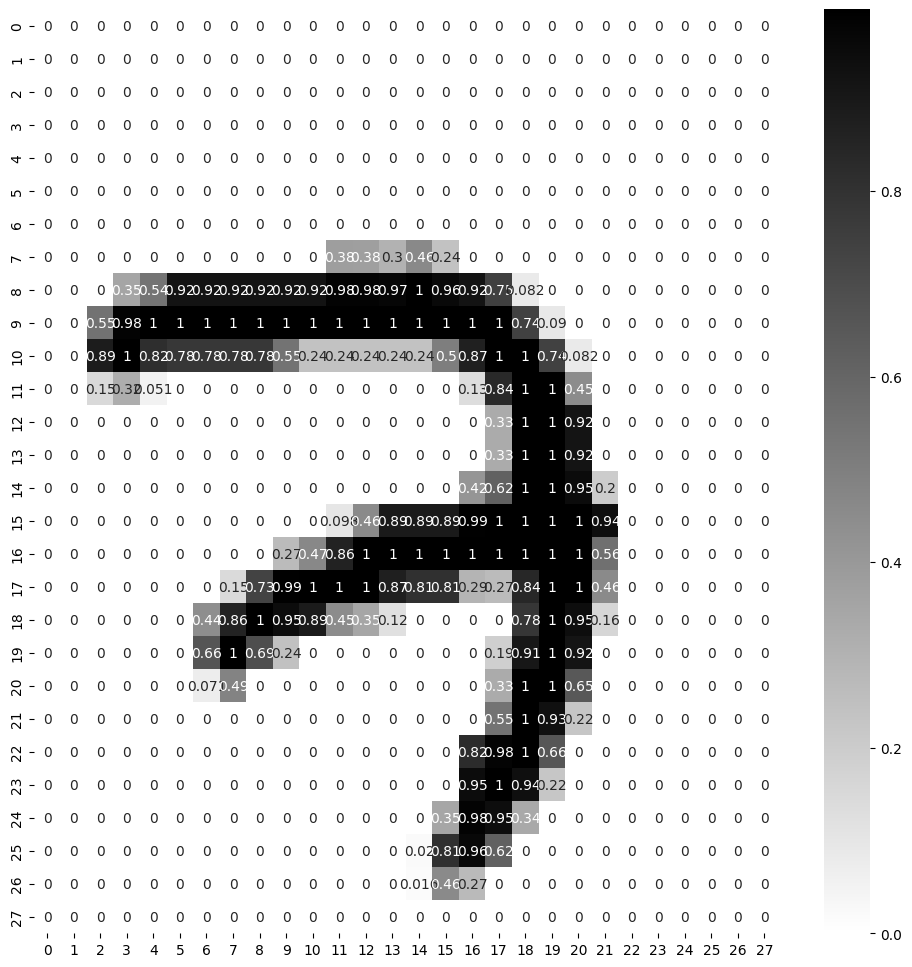

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train[0], annot =True, cmap = "binary")

In [12]:
#actual value of y_train
y_train[0]

7

**Define Keras Model**

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [14]:
model.layers

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
#first_layer*second_layer + bias
784*300+300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [17]:
#total parametres to be trained
sum((235500, 30100, 1010))

266610

In [18]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name) is hidden1

True

In [19]:
hidden1.get_weights()

[array([[-0.01060103,  0.01125859,  0.0493762 , ..., -0.03208478,
          0.0685064 ,  0.07156068],
        [-0.03234084, -0.05226936, -0.01117411, ...,  0.05955286,
          0.00233711,  0.00226677],
        [ 0.03152767,  0.03936833,  0.00510057, ...,  0.04175303,
          0.04225942, -0.04289813],
        ...,
        [-0.02444106, -0.01607035,  0.00511609, ..., -0.00844577,
          0.02138229, -0.00110429],
        [-0.04166989,  0.04221991, -0.05452104, ...,  0.05652153,
          0.01709008,  0.03576861],
        [ 0.00582137,  0.00503338,  0.05810173, ..., -0.04290434,
          0.0193636 , -0.0554339 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
print("shape\n", weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.01060103,  0.01125859,  0.0493762 , ..., -0.03208478,
         0.0685064 ,  0.07156068],
       [-0.03234084, -0.05226936, -0.01117411, ...,  0.05955286,
         0.00233711,  0.00226677],
       [ 0.03152767,  0.03936833,  0.00510057, ...,  0.04175303,
         0.04225942, -0.04289813],
       ...,
       [-0.02444106, -0.01607035,  0.00511609, ..., -0.00844577,
         0.02138229, -0.00110429],
       [-0.04166989,  0.04221991, -0.05452104, ...,  0.05652153,
         0.01709008,  0.03576861],
       [ 0.00582137,  0.00503338,  0.05810173, ..., -0.04290434,
         0.0193636 , -0.0554339 ]], dtype=float32)

In [22]:
print("shape\n", biases.shape)
biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**Compile Keras Model**

In [27]:
%%time
loss_function = "sparse_categorical_crossentropy"
optimizer = "SGD"
metrics = ["accuracy"]

model.compile(loss= loss_function, optimizer = optimizer, metrics = metrics)

CPU times: user 9.71 ms, sys: 0 ns, total: 9.71 ms
Wall time: 9.45 ms


In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)


**Fit Keras Model**

In [28]:
%%time
#with validation dataset
valid_set = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs = 10, validation_data = valid_set, batch_size = 32)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6069 - accuracy: 0.8383 - val_loss: 0.3091 - val_accuracy: 0.9124
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2920 - accuracy: 0.9167 - val_loss: 0.2438 - val_accuracy: 0.9312
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2385 - accuracy: 0.9316 - val_loss: 0.2083 - val_accuracy: 0.9410
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2035 - accuracy: 0.9415 - val_loss: 0.1801 - val_accuracy: 0.9468
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1776 - accuracy: 0.9487 - val_loss: 0.1599 - val_accuracy: 0.9570
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1577 - accuracy: 0.9539 - val_loss: 0.1442 - val_accuracy: 0.9614
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1412 - accuracy: 0.9598 - val_loss: 0.1328 - val_accuracy:

**Save Model**

In [31]:
import time
import os
def saveModel_path(model_dir= "/content/drive/MyDrive/Keras_model"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [32]:
unique_path = model.save(saveModel_path())
unique_path

your model will be saved at the following location
/content/drive/MyDrive/Keras_model/Model_2024_07_23_10_49_06_.h5


In [33]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [43]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.6069,0.8383,0.3091,0.9124
1,0.2920,0.9167,0.2438,0.9312
2,0.2385,0.9316,0.2083,0.9410
3,0.2035,0.9415,0.1801,0.9468
4,0.1776,0.9487,0.1599,0.9570
5,0.1577,0.9539,0.1442,0.9614
6,0.1412,0.9598,0.1328,0.9640
7,0.1281,0.9635,0.1238,0.9678
8,0.1166,0.9663,0.1168,0.9692
9,0.1072,0.9691,0.1097,0.9732


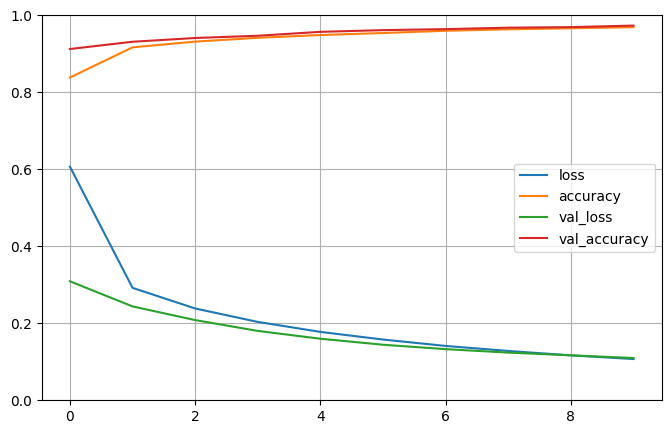

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred_valid = np.argmax(model.predict(X_valid), axis = -1)
print("y valid predicted shape", y_pred_valid.shape)

print("y valid true shape", y_valid.shape)
print(confusion_matrix(y_pred_valid, y_valid))
print(classification_report(y_pred_valid, y_valid))

157/157 [==============================] - 0s 2ms/step
y valid predicted shape (5000,)
y valid true shape (5000,)
[[474   0   1   0   1   0   2   1   0   3]
 [  0 555   5   2   2   1   2   1   5   2]
 [  0   2 473   5   3   2   1   2   2   0]
 [  1   2   1 471   0   5   0   0   3   2]
 [  0   0   0   0 522   1   1   3   2   2]
 [  0   1   1   7   0 420   3   0   4   2]
 [  2   0   1   0   2   3 492   0   1   1]
 [  1   1   3   4   1   1   0 538   1   4]
 [  0   2   3   2   0   1   0   1 444   2]
 [  1   0   0   2   4   0   0   4   0 477]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       482
           1       0.99      0.97      0.98       575
           2       0.97      0.97      0.97       490
           3       0.96      0.97      0.96       485
           4       0.98      0.98      0.98       531
           5       0.97      0.96      0.96       438
           6       0.98      0.98      0.98       502
           7       0.9

**Predictions**

In [45]:
X_new = X_test[: 4]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 17ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [46]:
y_pred = np.argmax(model.predict(X_new), axis = -1)
y_pred

1/1 [==============================] - 0s 27ms/step


array([7, 2, 1, 0])

In [47]:
y_test_new = y_test[: 4]

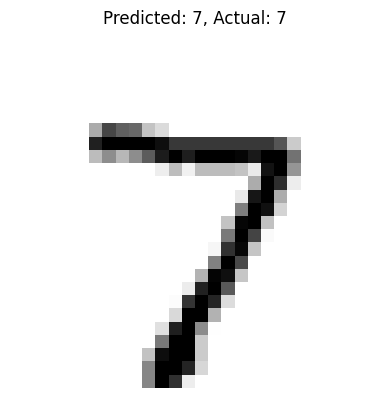

------------------------------------------------------------


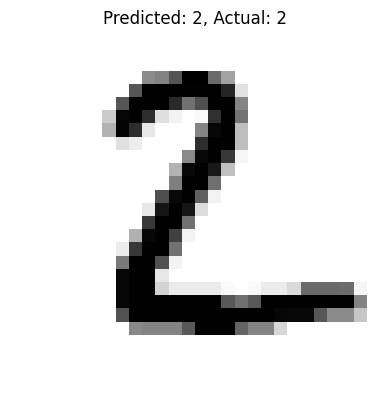

------------------------------------------------------------


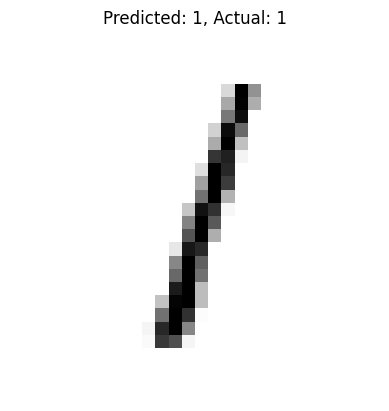

------------------------------------------------------------


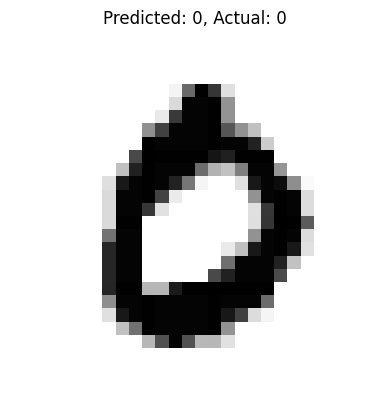

------------------------------------------------------------


In [48]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap = "binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)